## Wine Fraud with Support Vector Machines
### A chemical analysis

In this project we are going to focus on the Wine Fraud data set.

The goal here is to build a machine learning model that attempts to accurately classify wines as either legitimate or fraudulent based on their chemical composition.

We will use support vector machines (SVM) to tackle this particular task. 

We'll essentially be attempting to find a hyperplane that can effectively separate the two classes i.e fraud or legit.

In [1]:
import numpy as np
# linear algebra, scientific computing

import pandas as pd
# data processing, manipulation and analysis

import matplotlib.pyplot as plt
# data visualization

import seaborn as sns
# data visualization

In [2]:
# reading in the data

df=pd.read_csv('wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.shape

# to return a tuple showing the number of rows and columns in our data set

(6497, 13)

In [5]:
df.info()

# checking the column data types and whether we have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


### Exploratory Data Analysis

In [6]:
# we have no null values so let's perform a rough statistical analysis of our data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
# let's check the distinct labels(classes) on our data set

df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [8]:
# we have two distinct classes but how many instances of each class do we have?

df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

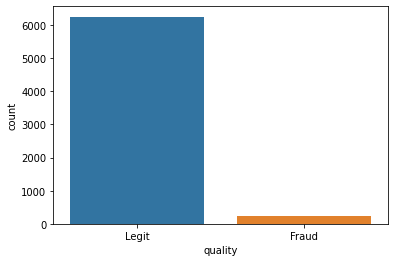

In [9]:
# clearly we have an imbalanced label
# let's visualize this realization

sns.countplot(x='quality',data=df)

In [10]:
df['type'].unique()

array(['red', 'white'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

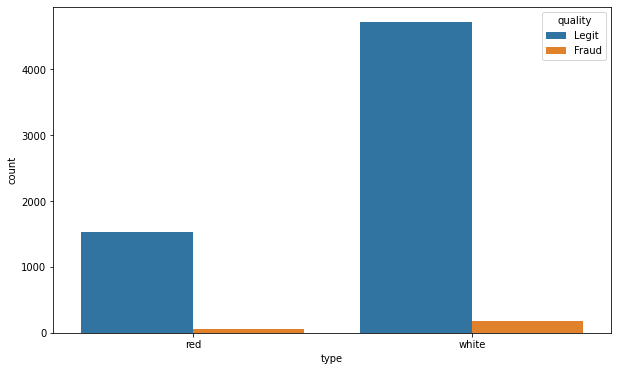

In [11]:
# we have two distinct wine types (red and white)
# let's check out the difference between the red and white wine types when it comes to fraud

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='type',hue='quality')

In [12]:
# let's separate the red wines from the white wines

reds=df[df['type']=='red']
whites=df[df['type']=='white']

In [13]:
# what percentage of red wines are fraudulent?

print('Percentage of fraudulent reds is: {}'.format(round(100*len(reds[reds['quality']=='Fraud'])/len(reds),2)))

Percentage of fraudulent reds is: 3.94


In [14]:
# what percentage of white wines are fraudulent?

print('Percentage of fraudulent whites is: {}'.format(round(100*len(whites[whites['quality']=='Fraud'])/len(whites),2)))

Percentage of fraudulent whites is: 3.74


In [15]:
# in order to perform cumputations on the labels(quality column), we need to map the string data into numerical values

df['fraud']=df['quality'].map({'Legit':0,'Fraud':1})

In [16]:
# checking how correlated each feature is with the label

df.corr()['fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
fraud                   1.000000
Name: fraud, dtype: float64

<AxesSubplot:>

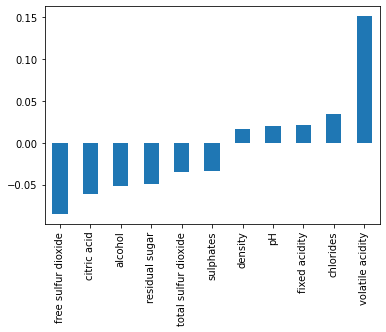

In [17]:
# let's sort the correlation values and visualize them

df.corr()['fraud'][:-1].sort_values().plot(kind='bar')

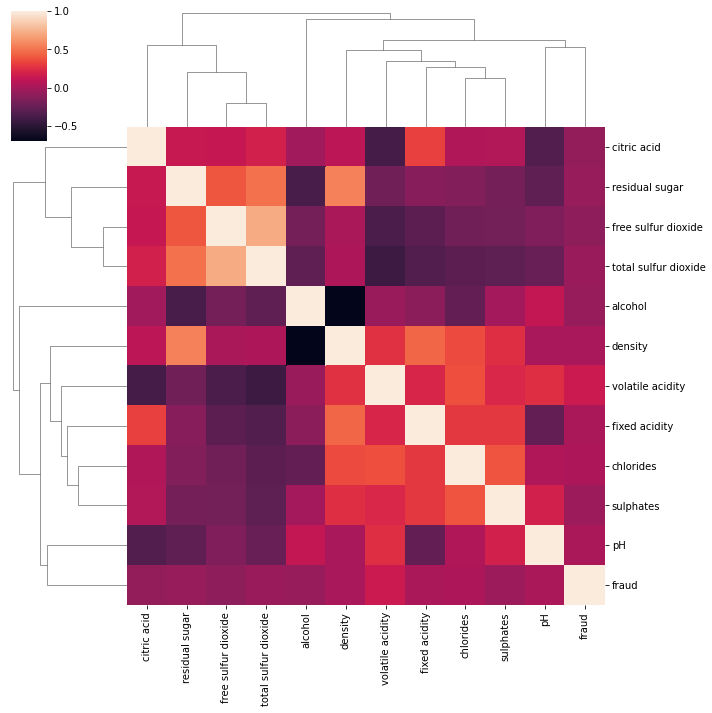

In [18]:
# building a clustermap to visualize the correlations

sns.clustermap(df.corr())

### Preparing the Data for Model Building

In [19]:
# since the 'type' columns is categorical, we need to get dummy variables

df['type']=pd.get_dummies(data=df['type'],drop_first=True)

# it is possible to reset this into a single column because 'type' is binary i.e just red or white
# if it were non-binary, we'd need to get the dummies as a sub dataframe and concatenate it with the original features

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0,0


In [21]:
# scikit-learn can take in the labels as strings
# we drop the 'fraud' column as it has he exact same information as the 'quality' column

df=df.drop('fraud',axis=1)

In [22]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,Legit,1


In [23]:
# we now separate our data into X(features) and y(labels)

X=df.drop('quality',axis=1)
y=df['quality']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# separating the data in training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [26]:
# scaling is a must for SVM

from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
# scaling y is ill-advised as it alters the definition of the target(label)

scaled_X_train=scaler.fit_transform(X_train)

In [29]:
scaled_X_test=scaler.transform(X_test)

# we don't fit to the X_test data to prevent data leakage from the test set into our model

### Building the Model

In [30]:
# now we import support vector classifier (SVC) form sklearn.svm model family

from sklearn.svm import SVC

In [32]:
# we now create an instance of SVC
# remember we established that our classes were unbalanced
# we therefore alter the 'class_weight' hyperparameter from the default ('None') to 'balanced'

svc=SVC(class_weight='balanced')

In [33]:
# with SVM we must perform cross validation via a Grid Search to find the best parameters

from sklearn.model_selection import GridSearchCV

In [34]:
# let's define a parameter grid

param_grid={'C':[0.001,0.01,0.1,0.5,1],
           'kernel':['linear','poly','rbf'],
           'degree':[2,3,4],
           'gamma':['scale','auto']}

In [35]:
# creating an instance of the grid search

grid_svc=GridSearchCV(svc,param_grid)

In [36]:
# now we fit the training data

grid_svc.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [37]:
# let's take a look at our best parameters

grid_svc.best_params_

{'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [38]:
y_preds=grid_svc.predict(scaled_X_test)

### Evaluation

In [39]:
# model evaluation

from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [40]:
accuracy_score(y_preds,y_test)

0.9538461538461539

In [41]:
confusion_matrix(y_preds,y_test)

array([[  3,   6],
       [ 24, 617]], dtype=int64)

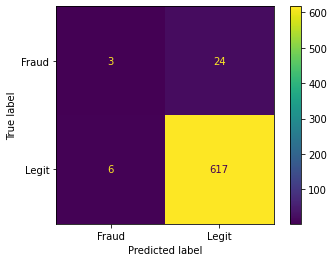

In [42]:
plot_confusion_matrix(grid_svc,scaled_X_test,y_test)

We misclassified 30 points.

24 fraudulent wines were incorrectly classified as legitimate and therein lies the problem.

Let's look at the precision, recall and f1-score of the illegitimate wines.

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

       Fraud       0.33      0.11      0.17        27
       Legit       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.65      0.55      0.57       650
weighted avg       0.94      0.95      0.94       650



### Conclusion

The model does really well with the legitimate wines.
But it performs poorly with the fraudulent ones.

The whole point of this model is to catch the fraudulent ones and it doesn't do so well in this regard.

However good the model is, chemical composition is not the only determinant of legitimacy.
We should therefore focus on other wine properties by expanding the feature set to include origin, label analysis, sedimentation etc.

### Thank you.